/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


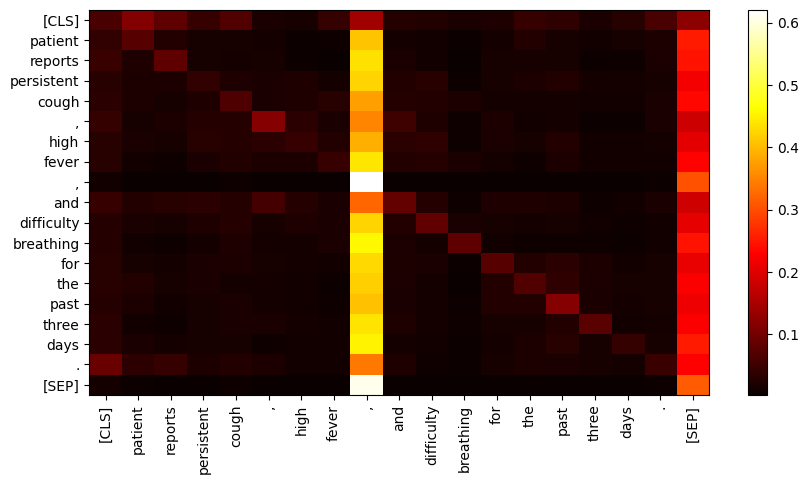

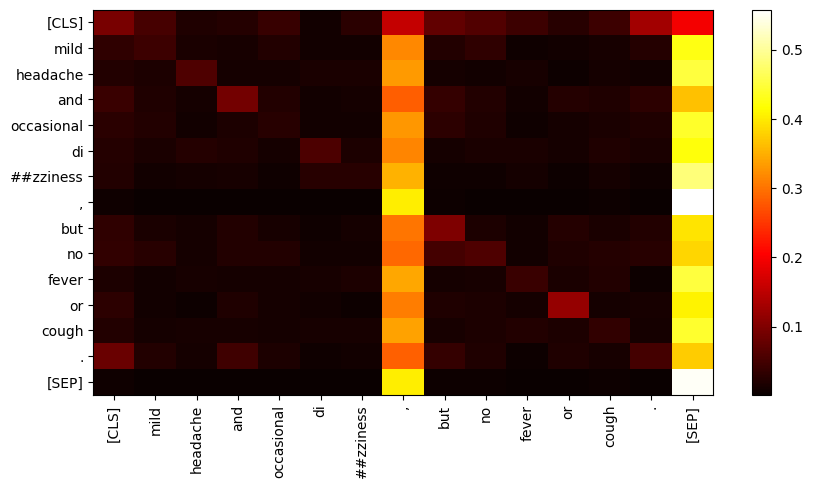

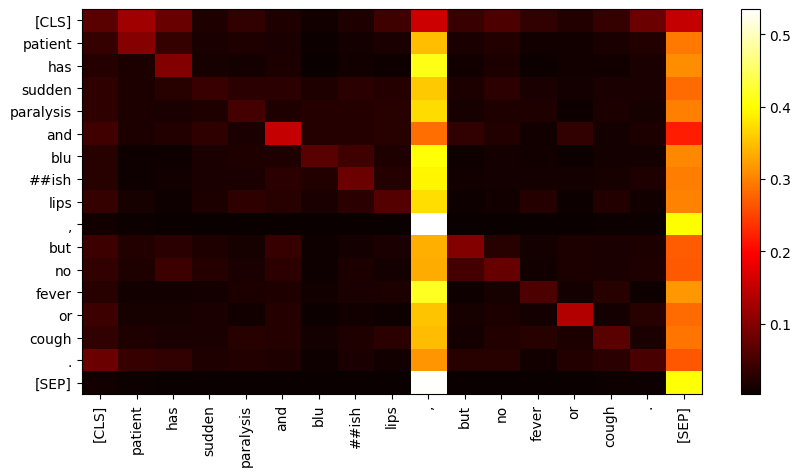

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

def get_attention_weights(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    attention = torch.stack(outputs.attentions).squeeze(1)
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze())
    return attention, tokens

def visualize_attention(text):
    attention, tokens = get_attention_weights(text)
    attention = attention[-1].mean(0).detach().numpy()

    fig, ax = plt.subplots(figsize=(10, 5))
    im = ax.imshow(attention, cmap="hot", aspect="auto")

    ax.set_xticks(range(len(tokens)))
    ax.set_yticks(range(len(tokens)))
    ax.set_xticklabels(tokens, rotation=90)
    ax.set_yticklabels(tokens)
    plt.colorbar(im)
    plt.show()


text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
visualize_attention(text1)
text2 = "Mild headache and occasional dizziness, but no fever or cough."
visualize_attention(text
text3 = "Patient has sudden paralysis and bluish lips, but no fever or cough."
visualize_attention(text3)
